# HW_4


## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

## Повторим а-ля алекснет 

обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 


from tensorflow.keras.utils import plot_model 

In [2]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import os

In [3]:
classes=['футболка', 'штаны', 'свитер', 'платье', 'плащ', 'сандали', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

In [4]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_fashion_mnist_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train shape: (60000, 28, 28)
60000 тренировочные примеры
10000 тестовые примеры


In [5]:
data_augmentation = False

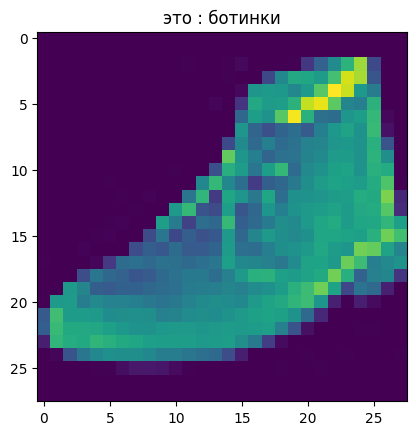

In [6]:
import random
N = random.randint(0, 10000)

plt.imshow(x_test[N][:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
1875/1875 [==============================] - 20s 8ms/step - loss: 1.0720 - accuracy: 0.6002 - val_loss: 0.7131 - val_accuracy: 0.7393
сохранить обученную модель как C:\Users\odind\AI GB\Courses\quarter 5\Введение в нейронные сети\les_4\saved_models\keras_fashion_mnist_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 0.7131 - accuracy: 0.7393
Test loss: 0.7131103873252869
Test accuracy: 0.739300012588501


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 96)        27744     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 96)          0

Что вернет ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=15, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip= False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

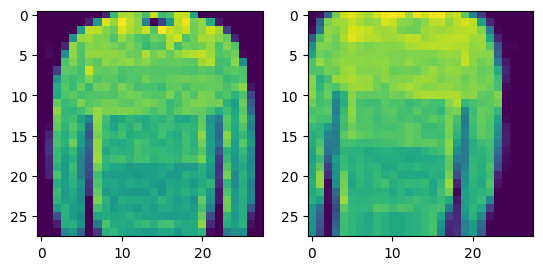

In [10]:
N=20
datagen.fit(x_test)
for imag,y  in datagen.flow(x_test[N:N+1,:,:,:],y_test[N:N+1], batch_size=1):
  plt.subplot(1,2,1)
  plt.imshow(x_test[N][:,:,:])
  plt.subplot(1,2,2)
  plt.imshow(imag[0,:,:,:])

  plt.show()
  if True:
    break


In [11]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

C:\Users\odind\anaconda3\envs\learning_tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 18s 9ms/step - loss: 0.8755 - accuracy: 0.6708 - val_loss: 0.6603 - val_accuracy: 0.7499


In [12]:
callback = tf.keras.callbacks.EarlyStopping(
                              monitor="val_loss",
                              min_delta=0.0001,
                              patience=5,
                              verbose=1,
                              mode="auto",
                              baseline=None,
                              restore_best_weights=True,
                          )

In [13]:
%%time

model.fit(
     x_train, 
     y_train, 
     batch_size=batch_size,
     epochs=10000, 
     validation_data=(x_test, y_test),
     callbacks=[callback]
 )

Epoch 1/10000
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5908 - accuracy: 0.7767 - val_loss: 0.5217 - val_accuracy: 0.8007
Epoch 2/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5075 - accuracy: 0.8093 - val_loss: 0.4604 - val_accuracy: 0.8336
Epoch 3/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4630 - accuracy: 0.8275 - val_loss: 0.4334 - val_accuracy: 0.8367
Epoch 4/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4338 - accuracy: 0.8400 - val_loss: 0.4093 - val_accuracy: 0.8481
Epoch 5/10000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4149 - accuracy: 0.8458 - val_loss: 0.3851 - val_accuracy: 0.8560
Epoch 6/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3950 - accuracy: 0.8534 - val_loss: 0.3812 - val_accuracy: 0.8586
Epoch 7/10000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3797 - accuracy: 0.8598 - val_

1875/1875 [==============================] - 14s 8ms/step - loss: 0.1776 - accuracy: 0.9329 - val_loss: 0.2268 - val_accuracy: 0.9181
Epoch 57/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1748 - accuracy: 0.9332 - val_loss: 0.2225 - val_accuracy: 0.9189
Epoch 58/10000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1738 - accuracy: 0.9339 - val_loss: 0.2230 - val_accuracy: 0.9182
Epoch 59/10000
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1706 - accuracy: 0.9359 - val_loss: 0.2290 - val_accuracy: 0.9177
Restoring model weights from the end of the best epoch.
Epoch 00059: early stopping
CPU times: total: 16min 38s
Wall time: 14min 16s


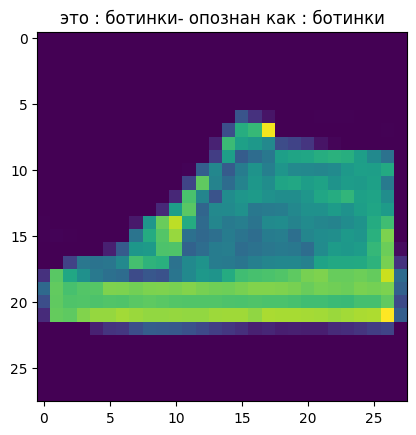

In [14]:
# N = random.randint(0, 10000)
N = 107
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Трудный ботинок распознан правильно, это радует)

91.77% вполне неплохо без подбора параметров

## оценить рост точности при увеличении глубины сети (больше слоев)

In [15]:
models = []

In [16]:
repeats = [0, 1, 2] 
start_neurons = [32]

In [17]:
%%time

for n in start_neurons:
    for repeat in repeats:
        name = f'start neuron: {n}, layers: {6 + repeat*2}'
        model = Sequential()
        model.add(Conv2D(n, (5, 5), padding='same', input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        k = 2
        # регулируем только эти слои:
        for _ in range(repeat):
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout( 0.25))
            model.add(Conv2D(n*k, (3, 3), padding='same'))
            model.add(Activation('relu'))
            k *= 2

        # остальные оставляем для сохранения стиля 
        # не знаю зачем - может и не надо было, но слишком долго ждал обученя
        for _ in range(3):
            model.add(Conv2D(n*k, (3, 3), padding='same'))
            model.add(Activation('relu'))
            k /= 2

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(2048))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))

        model.compile(
            loss='categorical_crossentropy',
            optimizer='SGD',
            metrics=['accuracy']
        )
        
        model.fit_generator(
            datagen.flow(x_train, y_train, batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test)
        )
        
        history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=10000,
                      validation_data=(x_test, y_test),
                      shuffle=True,
                      callbacks=[callback]
                  )

        scores = model.evaluate(x_test, y_test, verbose=1)
        
        models.append({
            'group': 0,
            'name': name,
            'model': model,
            'history': history,
            'score_loss': scores[0],
            'score_metric': scores[1],            
        })

1875/1875 [==============================] - 18s 9ms/step - loss: 1.0983 - accuracy: 0.5953 - val_loss: 0.6415 - val_accuracy: 0.7571
Epoch 1/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5165 - accuracy: 0.8084 - val_loss: 0.4298 - val_accuracy: 0.8409
Epoch 2/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4217 - accuracy: 0.8440 - val_loss: 0.3780 - val_accuracy: 0.8627
Epoch 3/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3812 - accuracy: 0.8596 - val_loss: 0.3444 - val_accuracy: 0.8746
Epoch 4/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3547 - accuracy: 0.8702 - val_loss: 0.3252 - val_accuracy: 0.8796
Epoch 5/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3315 - accuracy: 0.8777 - val_loss: 0.3136 - val_accuracy: 0.8870
Epoch 6/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3149 - accuracy: 0.8841 - val_loss: 0.2985 -

1875/1875 [==============================] - 14s 7ms/step - loss: 0.2753 - accuracy: 0.8977 - val_loss: 0.2698 - val_accuracy: 0.8987
Epoch 14/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2703 - accuracy: 0.8994 - val_loss: 0.2629 - val_accuracy: 0.9041
Epoch 15/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2658 - accuracy: 0.9018 - val_loss: 0.2530 - val_accuracy: 0.9071
Epoch 16/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2580 - accuracy: 0.9026 - val_loss: 0.2626 - val_accuracy: 0.9014
Epoch 17/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2513 - accuracy: 0.9059 - val_loss: 0.2478 - val_accuracy: 0.9099
Epoch 18/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2478 - accuracy: 0.9080 - val_loss: 0.2458 - val_accuracy: 0.9107
Epoch 19/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2437 - accuracy: 0.9093 - val_loss: 0.

1875/1875 [==============================] - 15s 8ms/step - loss: 0.2580 - accuracy: 0.9046 - val_loss: 0.2581 - val_accuracy: 0.9042
Epoch 27/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2573 - accuracy: 0.9037 - val_loss: 0.2570 - val_accuracy: 0.9064
Epoch 28/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2534 - accuracy: 0.9038 - val_loss: 0.2525 - val_accuracy: 0.9060
Epoch 29/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2480 - accuracy: 0.9072 - val_loss: 0.2525 - val_accuracy: 0.9043
Epoch 30/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2447 - accuracy: 0.9091 - val_loss: 0.2529 - val_accuracy: 0.9042
Epoch 31/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2428 - accuracy: 0.9095 - val_loss: 0.2615 - val_accuracy: 0.9003
Epoch 32/10000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2385 - accuracy: 0.9110 - val_loss: 0.

In [18]:
results = pd.DataFrame(models).drop(['model', 'history'],axis=1)
results = results.loc[results['group'] == 0]
results

,group,name,score_loss,score_metric
0,0,"start neuron: 32, layers: 6",0.206921,0.9285
1,0,"start neuron: 32, layers: 8",0.209948,0.9249
2,0,"start neuron: 32, layers: 10",0.216910,0.9211


In [19]:
results.sort_values(by=['score_metric'], ascending=False)[:20]

,group,name,score_loss,score_metric
0,0,"start neuron: 32, layers: 6",0.206921,0.9285
1,0,"start neuron: 32, layers: 8",0.209948,0.9249
2,0,"start neuron: 32, layers: 10",0.216910,0.9211


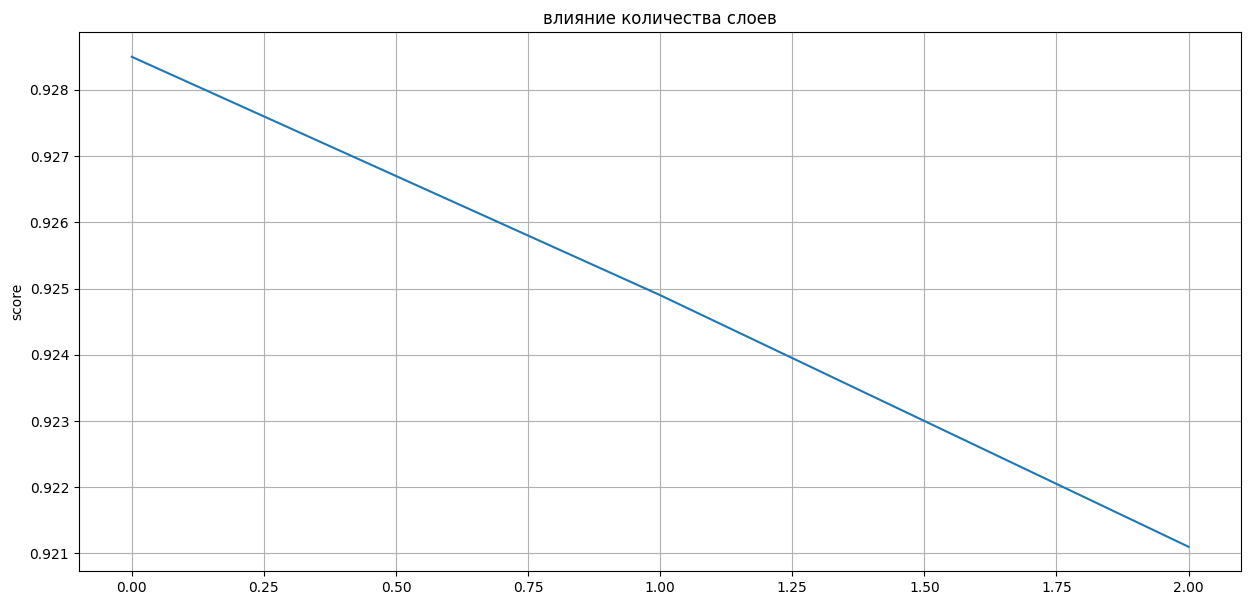

In [20]:
plt.figure(figsize=(15,7))
plt.plot(results['score_metric'])
plt.ylabel('score')
plt.grid('On')
plt.title('влияние количества слоев')
plt.show()

## оценить рост точности при увеличении ширины сети (больше ядер)

In [21]:
repeats = [1]
start_neurons = [16, 32, 64, 128]

In [22]:
%%time

for n in start_neurons:
    for repeat in repeats:
        name = f'start neuron: {n}, layers: {6 + repeat*2}'
        model = Sequential()
        model.add(Conv2D(n, (5, 5), padding='same', input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        k = 2
        for _ in range(repeat):
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout( 0.25))
            model.add(Conv2D(n*k, (3, 3), padding='same'))
            model.add(Activation('relu'))
            k *= 2

        for _ in range(3):
            model.add(Conv2D(n*k, (3, 3), padding='same'))
            model.add(Activation('relu'))
            k /= 2

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(2048))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))

        model.compile(
            loss='categorical_crossentropy',
            optimizer='SGD',
            metrics=['accuracy']
        )
        
        model.fit_generator(
            datagen.flow(x_train, y_train, batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test)
        )
        
        history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=10000,
                      validation_data=(x_test, y_test),
                      shuffle=True,
                      callbacks=[callback]
                  )

        # проверка работы обученной модели
        scores = model.evaluate(x_test, y_test, verbose=1)
        
        models.append({
            'group': 1,
            'name': name,
            'model': model,
            'history': history,
            'score_loss': scores[0],
            'score_metric': scores[1],            
        })

C:\Users\odind\anaconda3\envs\learning_tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 18s 9ms/step - loss: 1.1682 - accuracy: 0.5677 - val_loss: 0.6847 - val_accuracy: 0.7330
Epoch 1/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5859 - accuracy: 0.7804 - val_loss: 0.4439 - val_accuracy: 0.8404
Epoch 2/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4700 - accuracy: 0.8273 - val_loss: 0.3998 - val_accuracy: 0.8527
Epoch 3/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4231 - accuracy: 0.8444 - val_loss: 0.3680 - val_accuracy: 0.8622
Epoch 4/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3970 - accuracy: 0.8533 - val_loss: 0.3421 - val_accuracy: 0.8733
Epoch 5/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3738 - accuracy: 0.8619 - val_loss: 0.3293 - val_accuracy: 0.8803
Epoch 6/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3579 - accuracy: 0.8669 - val_loss: 0.3159 -

1875/1875 [==============================] - 12s 7ms/step - loss: 0.1830 - accuracy: 0.9302 - val_loss: 0.2007 - val_accuracy: 0.9284
Epoch 56/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1782 - accuracy: 0.9321 - val_loss: 0.1990 - val_accuracy: 0.9288
Epoch 57/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1744 - accuracy: 0.9342 - val_loss: 0.2040 - val_accuracy: 0.9266
Epoch 58/10000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1755 - accuracy: 0.9322 - val_loss: 0.2006 - val_accuracy: 0.9264
Epoch 59/10000
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1713 - accuracy: 0.9352 - val_loss: 0.2019 - val_accuracy: 0.9261
Restoring model weights from the end of the best epoch.
Epoch 00059: early stopping
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1784 - accuracy: 0.5592 - val_loss: 0.7008 - val_accuracy: 0.7410
Epoch 1/10000
1875/1875 [===========================

1875/1875 [==============================] - 14s 7ms/step - loss: 0.1541 - accuracy: 0.9417 - val_loss: 0.1997 - val_accuracy: 0.9270
Epoch 50/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1515 - accuracy: 0.9425 - val_loss: 0.2000 - val_accuracy: 0.9301
Epoch 51/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1497 - accuracy: 0.9426 - val_loss: 0.2010 - val_accuracy: 0.9255
Epoch 52/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1479 - accuracy: 0.9439 - val_loss: 0.2013 - val_accuracy: 0.9252
Epoch 53/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1443 - accuracy: 0.9451 - val_loss: 0.2049 - val_accuracy: 0.9251
Epoch 54/10000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1435 - accuracy: 0.9456 - val_loss: 0.2012 - val_accuracy: 0.9283
Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
1875/1875 [==========================

1875/1875 [==============================] - 35s 18ms/step - loss: 1.1456 - accuracy: 0.5719 - val_loss: 0.6518 - val_accuracy: 0.7564
Epoch 1/10000
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5450 - accuracy: 0.7982 - val_loss: 0.4402 - val_accuracy: 0.8381
Epoch 2/10000
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4339 - accuracy: 0.8388 - val_loss: 0.3829 - val_accuracy: 0.8579
Epoch 3/10000
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3869 - accuracy: 0.8564 - val_loss: 0.3672 - val_accuracy: 0.8660
Epoch 4/10000
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3564 - accuracy: 0.8679 - val_loss: 0.3375 - val_accuracy: 0.8759
Epoch 5/10000
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3359 - accuracy: 0.8756 - val_loss: 0.3325 - val_accuracy: 0.8772
Epoch 6/10000
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3172 - accuracy: 0.8820 - val_loss: 0

In [23]:
results = pd.DataFrame(models).drop(['model', 'history'],axis=1)
results = results.loc[results['group'] == 1]
results

,group,name,score_loss,score_metric
3,1,"start neuron: 16, layers: 8",0.199008,0.9275
4,1,"start neuron: 32, layers: 8",0.199670,0.9270
5,1,"start neuron: 64, layers: 8",0.196641,0.9328
6,1,"start neuron: 128, layers: 8",0.205391,0.9290


In [24]:
results.sort_values(by=['score_metric'], ascending=False)[:20]

,group,name,score_loss,score_metric
5,1,"start neuron: 64, layers: 8",0.196641,0.9328
6,1,"start neuron: 128, layers: 8",0.205391,0.9290
3,1,"start neuron: 16, layers: 8",0.199008,0.9275
4,1,"start neuron: 32, layers: 8",0.199670,0.9270


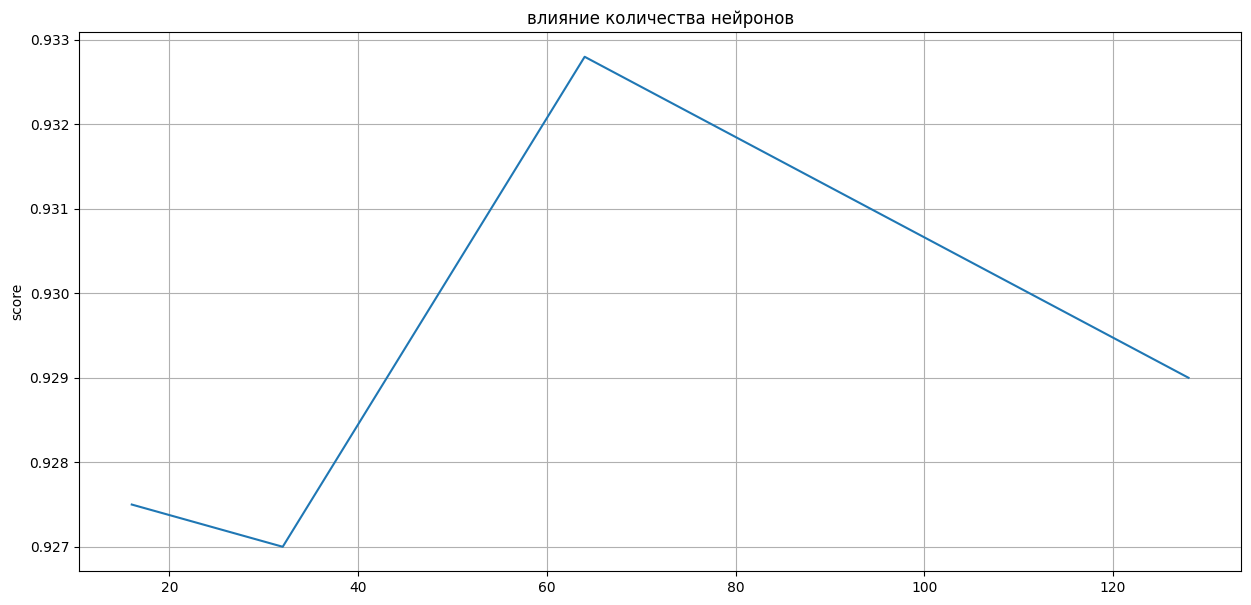

In [25]:
plt.figure(figsize=(15,7))
plt.plot(start_neurons, results['score_metric'])
plt.ylabel('score')
plt.grid('On')
plt.title('влияние количества нейронов')
plt.show()

Получился пик на 64 стартовых нейронах. Как обычно: много - плохо, мало - тоже плохо

In [27]:
results = pd.DataFrame(models).drop(['model', 'history'],axis=1)
results.sort_values(by=['score_metric'], ascending=False)[:20]

,group,name,score_loss,score_metric
5,1,"start neuron: 64, layers: 8",0.196641,0.9328
6,1,"start neuron: 128, layers: 8",0.205391,0.9290
0,0,"start neuron: 32, layers: 6",0.206921,0.9285
3,1,"start neuron: 16, layers: 8",0.199008,0.9275
4,1,"start neuron: 32, layers: 8",0.199670,0.9270
1,0,"start neuron: 32, layers: 8",0.209948,0.9249
2,0,"start neuron: 32, layers: 10",0.216910,0.9211
